In [1]:
#%matplotlib widget
%matplotlib ipympl

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import numpy.random as nr

In [33]:
# generate vertices of a cube in d dimensions
# enumerate all combinations of {0,1} in each of d dimensions
# this is like counting in binary with d bits
# so there are 2^d vertices
# subtract 0.5 from each dimension of each vertex to center the cube
def vertices(d):
    nv = 2**d
    va = np.zeros([nv,d])
    for i in range(nv):
        for j in range(d):
            b = 2**j
            va[i][j] = (i & b)/b
    return va - 0.5

# squared distance between 2 points in d-dimensional space
def distsq(p1,p2):
    return ((p1-p2)**2).sum()

# each vertex has d edges
# for number of unique edges, divide by 2 since an edge connects 2 vertices
# so there are d*2^(d-1) unique edges in d dimensions
# compare each vertex to all other vertices (no self-comparison)
# only define and draw edges where distance between vertices is one
# define each edge by its 2 endpoints
# no particular order of vertices in edge definition
# no particular order of edges in d-cube definition
def edges(d):
    va = vertices(d)
    nv = len(va)
    ne = d*2**(d-1)
    ea = np.zeros([ne,2,d])
    indx = 0
    for i in range(nv):
        vi = va[i]
        for j in range(i+1,nv):
            vj = va[j]
            if distsq(vi,vj) <= 1.0:
                ea[indx][0] = vi
                ea[indx][1] = vj
                indx += 1
    return ea

In [34]:
# given list of edges
# each edge defined by a pair of 2-d points
# draw a line to represent each edge
def draw2d(ea):
    ne = len(ea)
    plt.figure().clf()
    for i in range(ne):
        x = [ea[i][0][0], ea[i][1][0]]
        y = [ea[i][0][1], ea[i][1][1]]
        plt.plot(x,y)
    plt.gca().set_aspect('equal')
    return

# given list of edges
# each edge defined by a pair of 3-d points
# draw a line to represent each edge
def draw3d(ea):
    ne = len(ea)
    ax = plt.figure().add_subplot(projection='3d')
    ax.cla()
    for i in range(ne):
        x = [ea[i][0][0], ea[i][1][0]]
        y = [ea[i][0][1], ea[i][1][1]]
        z = [ea[i][0][2], ea[i][1][2]]
        ax.plot(x,y,z)
    ax.set_aspect('equal')
    #ax.legend()
    return

In [35]:
# instantiate edges of d-cubes in 2, 3, and 4 dimensions
edges2d = edges(2)
edges3d = edges(3)
edges4d = edges(4)

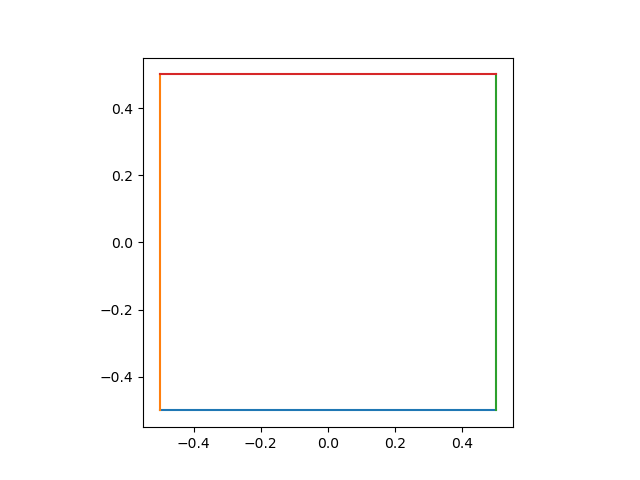

In [36]:
# draw 2-cube in 2 dimensions
draw2d(edges2d);plt.show()

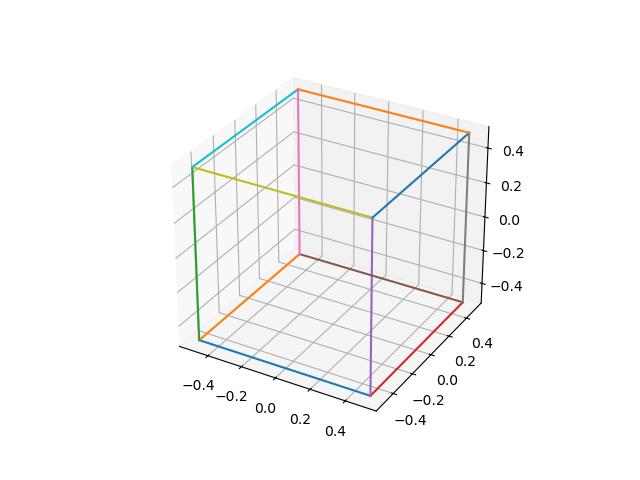

In [38]:
# draw 3-cube in 3 dimensions
# hopefully 3D plot is interactive
draw3d(edges3d);plt.show()

In [30]:
# return unit vector in direction of input vector
def unitv(v):
    r = ((v**2).sum())**0.5
    return v/r

# generate random unit vector in d dimensions
def randuv(d):
    return unitv(nr.randn(d))

# dot product of 2 vectors in d dimensions
def dot(v1,v2):
    return (v1*v2).sum()

# 
def rand_subspace(d_in, d_out):
    v = np.zeros([d_out, d_in])
    for i in range(d_out):
        tmp = randuv(d_in)
        for j in range(i):
            tmp = unitv(tmp - dot(tmp,v[j])*v[j])
        v[i] = tmp
    return v

# 
def project_subspace(edges_in, v):
    shape_in = edges_in.shape
    shape_out = (shape_in[0], shape_in[1], v.shape[0])
    edges_out = np.zeros(shape_out)
    for i in range(shape_out[0]):
        for j in range(shape_out[1]):
            for k in range(shape_out[2]):
                edges_out[i][j][k] = dot(edges_in[i][j],v[k])
    return edges_out

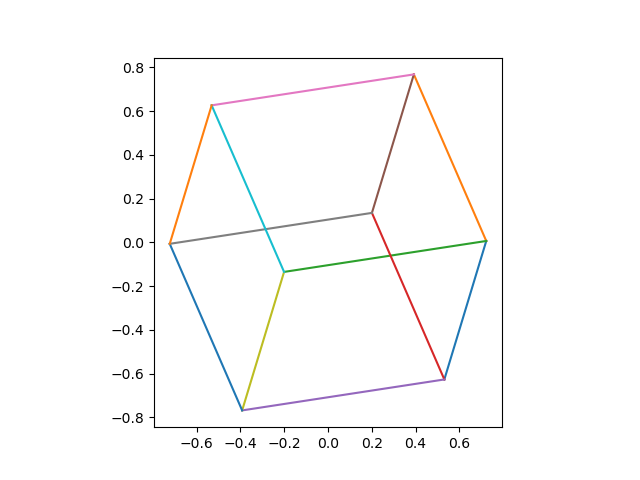

In [40]:
# project 3-cube into randomly oriented 2-space and draw in 2D
draw2d(project_subspace(edges3d,rand_subspace(3,2)));plt.show()

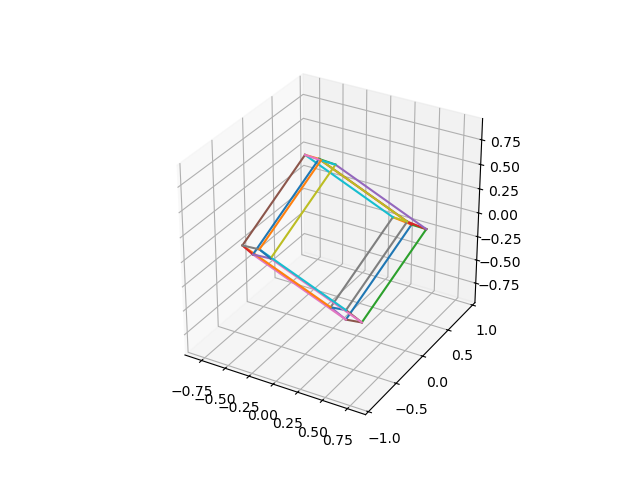

In [41]:
# project 4-cube into randomly oriented 3-space and draw in 3D
draw3d(project_subspace(edges4d,rand_subspace(4,3)));plt.show()

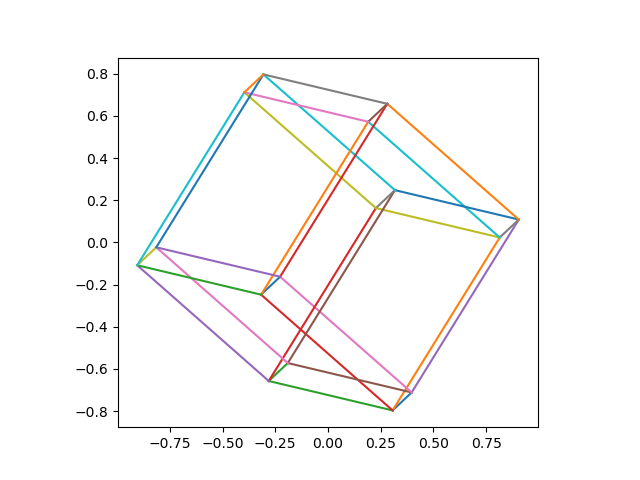

In [42]:
# project 4-cube into randomly oriented 2-space and draw in 2D
draw2d(project_subspace(edges4d,rand_subspace(4,2)));plt.show()